# Project 1 - Whether the Client Subscribed to a Term Deposit.

# Problem Statement
The dataset for project 1 contains information from a bank marketing campaign. The objective is to analyse the provided data to understand the factors that influence whether a client will subscribe to a term deposit. The dataset includes various attributes such as age, job, marital status, education, default status, balance, housing loan status, personal loan status, contact communication type, and details of the marketing campaign (day, month, duration, campaign, previous contacts, and outcome). The target variable is whether the client subscribed to a term deposit.

We need to identify patterns and build a predictive model to forecast the likelihood of a client subscribing to a term deposit based on the provided attributes. This analysis will help the bank optimize future marketing campaigns and target potential clients more effectively.



In [123]:
import pandas as pd

In [87]:
df = pd.read_csv("D://bank-full.csv")

In [88]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
1,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
2,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
3,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
4,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


# Cleaning the dataset

In [89]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [90]:
df.drop({'day','month'},axis=1,inplace=True)

In [91]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,33,admin.,married,tertiary,no,882,no,no,telephone,39,1,151,3,failure,no
1,42,admin.,single,secondary,no,-247,yes,yes,telephone,519,1,166,1,other,yes
2,33,services,married,secondary,no,3444,yes,no,telephone,144,1,91,4,failure,yes
3,36,management,married,tertiary,no,2415,yes,no,telephone,73,1,86,4,other,no
4,36,management,married,tertiary,no,0,yes,no,telephone,140,1,143,3,failure,yes


# Encoding the categorical values

In [92]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['y'] = le.fit_transform(df['y'])


# Scaling the continuous variables values 

In [93]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['age']=ss.fit_transform(df[['age']])
df['balance']=ss.fit_transform(df[['balance']])
df['duration']=ss.fit_transform(df[['duration']])
df['campaign']=ss.fit_transform(df[['campaign']])
df['pdays']=ss.fit_transform(df[['pdays']])
df['previous']=ss.fit_transform(df[['pdays']])

In [94]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,-0.689921,0,1,2,0,-0.217335,0,0,1,-0.941159,-0.679606,-0.646136,-0.646136,0,0
1,0.107793,0,2,1,0,-0.583372,1,1,1,1.091119,-0.679606,-0.511995,-0.511995,1,1
2,-0.689921,7,1,1,0,0.613301,1,0,1,-0.496598,-0.679606,-1.182698,-1.182698,0,1
3,-0.424016,4,1,2,0,0.279685,1,0,1,-0.797206,-0.679606,-1.227412,-1.227412,1,0
4,-0.424016,4,1,2,0,-0.503291,1,0,1,-0.513534,-0.679606,-0.717678,-0.717678,0,1


In [95]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

 # Dividing the data into Training and Testing Parts

In [96]:
from sklearn.model_selection import train_test_split
X=df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome']]
Y=df['y']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y) #70% training part

# Modelling the data in random forest model

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [98]:
Y_pred = rf.predict(X_test)
Y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [99]:
Y_test

7675    0
1187    0
7752    0
1529    0
5821    0
       ..
4984    0
925     0
4944    0
7267    1
3283    0
Name: y, Length: 2353, dtype: int32

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [101]:
print('RandomForestClassifier')
print("accuracy: ",accuracy_score(Y_test, Y_pred), "precision:",precision_score(Y_test, Y_pred),"recall:", recall_score(Y_test, Y_pred) , "f1_score:", f1_score(Y_test, Y_pred))

RandomForestClassifier
accuracy:  0.84190395240119 precision: 0.6943127962085308 recall: 0.5466417910447762 f1_score: 0.6116910229645095


In [102]:
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

duration     0.225328
poutcome     0.168507
previous     0.117275
pdays        0.114699
balance      0.095124
age          0.089771
housing      0.046436
job          0.046154
campaign     0.033498
education    0.022984
marital      0.021265
loan         0.010874
contact      0.007155
default      0.000929
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


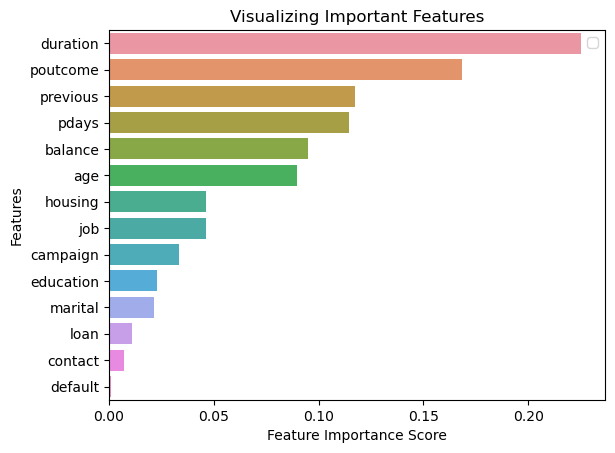

In [103]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

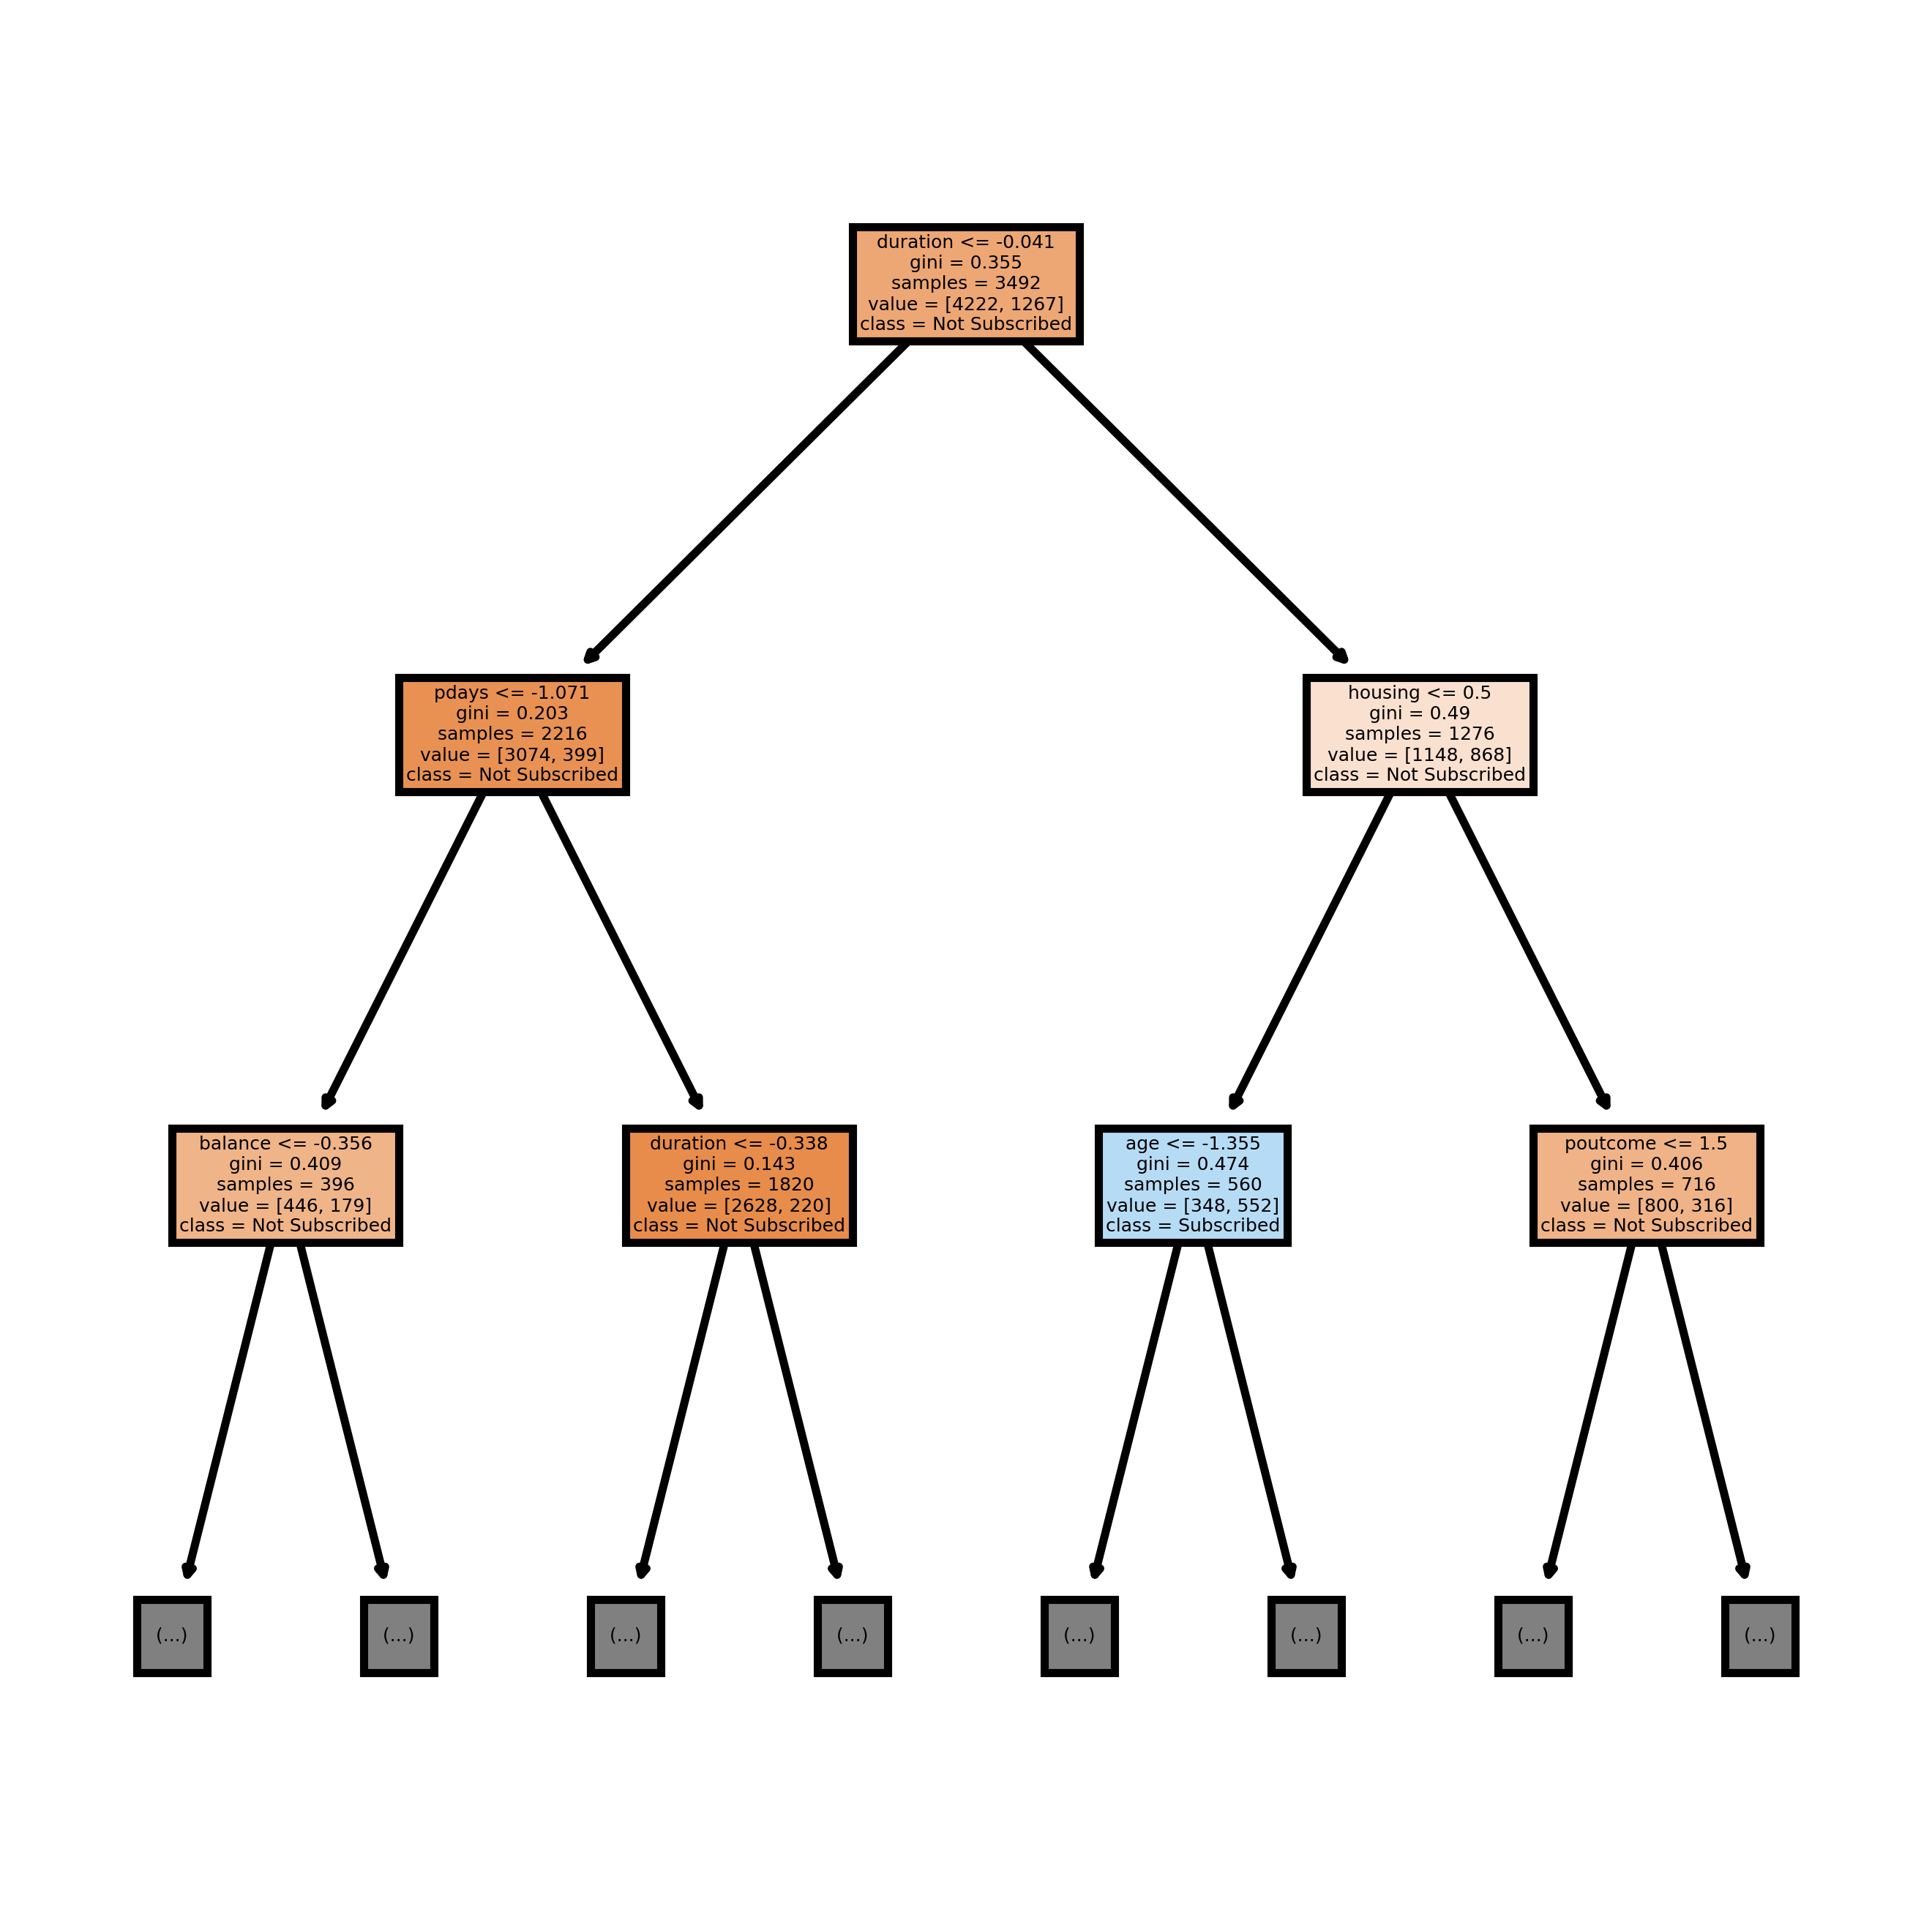

In [104]:
from sklearn.tree import plot_tree
from sklearn import tree
fn=X_train.columns
cn=['Not Subscribed','Subscribed']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               max_depth=2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

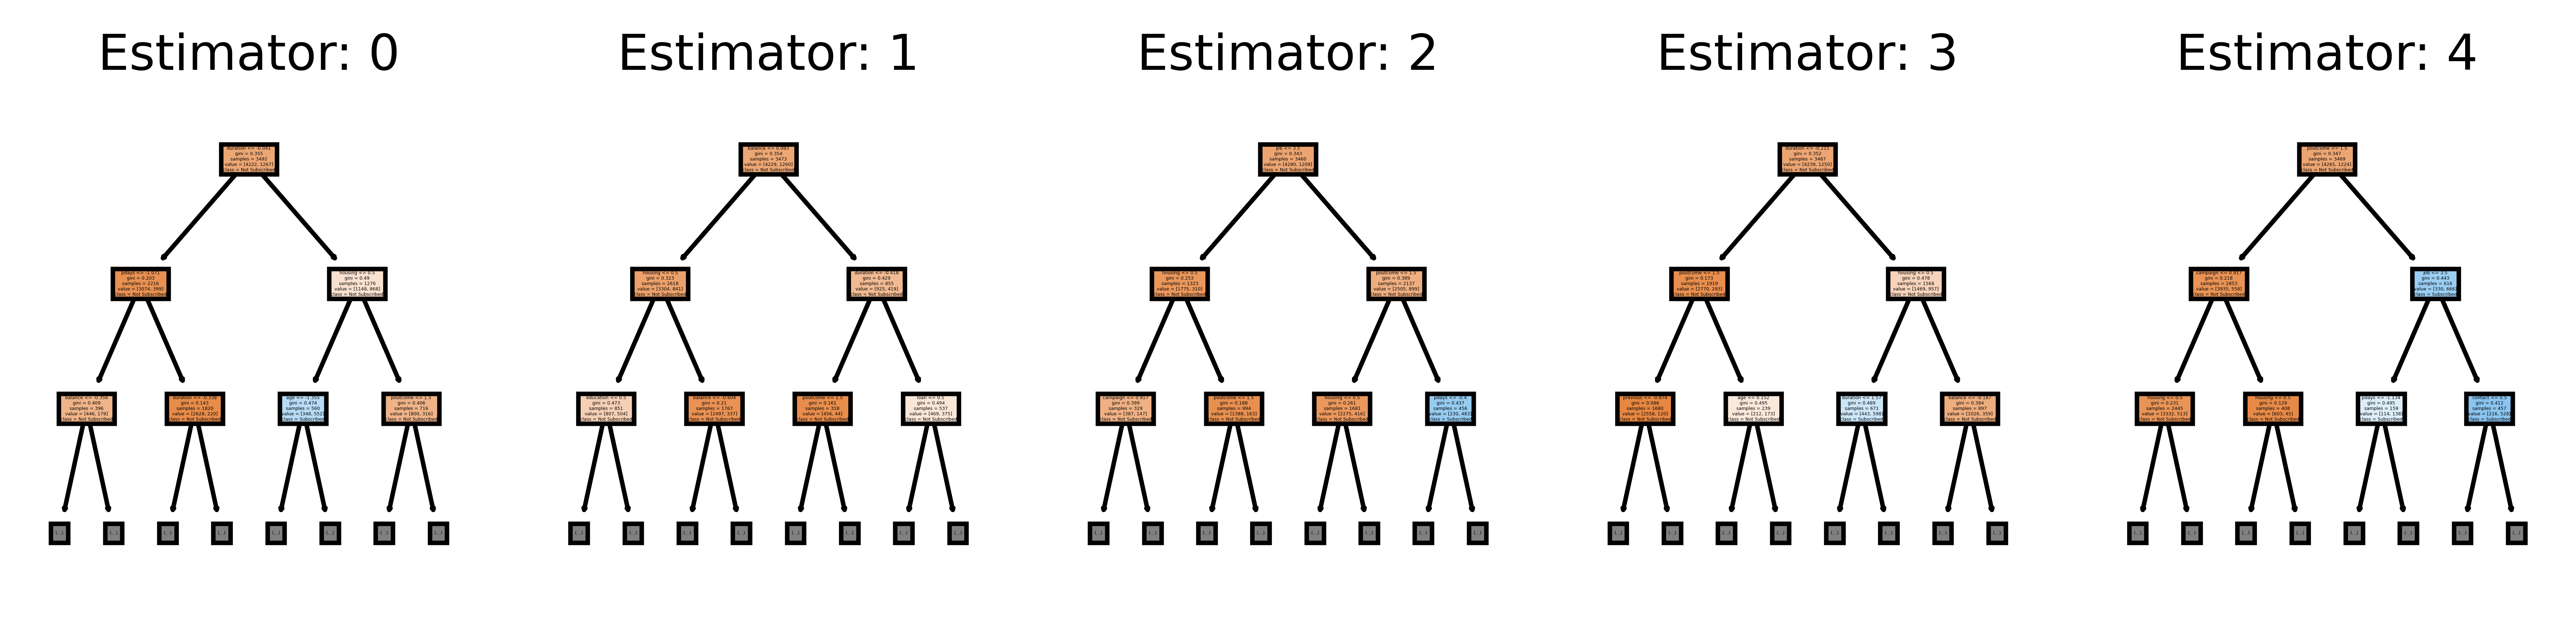

In [105]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   max_depth=2,
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

# Modelling the data in KNeighborsClassifier model

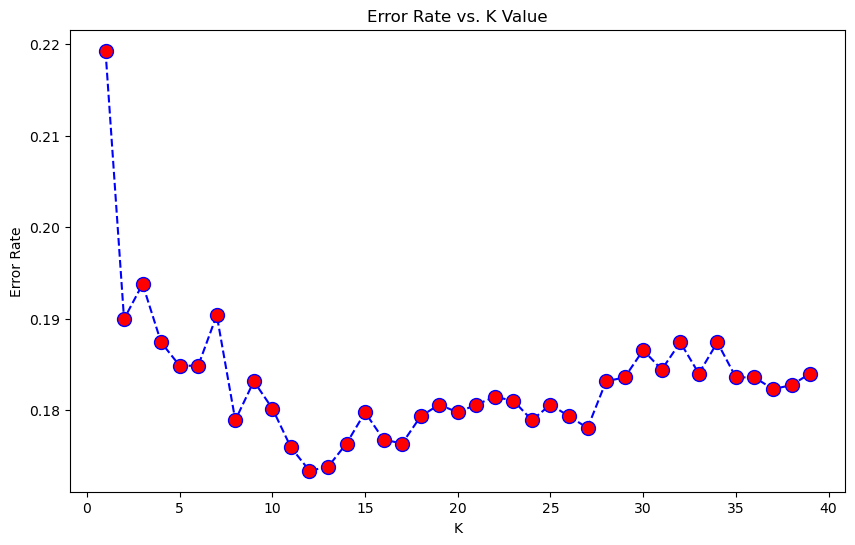

Minimum error:- 0.17339566510837234 at K = 12


In [106]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [107]:
knn = KNeighborsClassifier(n_neighbors=12)

In [108]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=12)

In [109]:
y_pred = knn.predict(X_test)

In [110]:
print ("kNN Classifier...")
print("accuracy: ",accuracy_score(y_pred,Y_test), "precision: ", precision_score(y_pred,Y_test), "recall: ", recall_score(y_pred,Y_test), "F1 score: ", f1_score(y_pred,Y_test))

kNN Classifier...
accuracy:  0.8266043348916277 precision:  0.47761194029850745 recall:  0.6666666666666666 F1 score:  0.5565217391304348


# Modelling the data in Xgboost Classifier model

In [111]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, Y_train)
y_pred3 = model.predict(X_test)

In [112]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [113]:
print ("XGBoost Classifier...")
print("accuracy: ",accuracy_score(y_pred3,Y_test), "precision: ", precision_score(y_pred3,Y_test), "recall: ", recall_score(y_pred3,Y_test), "F1 score: ", f1_score(y_pred3,Y_test))

XGBoost Classifier...
accuracy:  0.8287292817679558 precision:  0.5652985074626866 recall:  0.6405919661733616 F1 score:  0.6005946481665014


In [114]:
feature_imp = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

poutcome     0.511907
housing      0.111045
duration     0.073036
loan         0.041756
contact      0.041129
pdays        0.038922
education    0.034356
balance      0.029394
age          0.028318
job          0.028050
campaign     0.027485
marital      0.024777
default      0.009825
previous     0.000000
dtype: float32

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


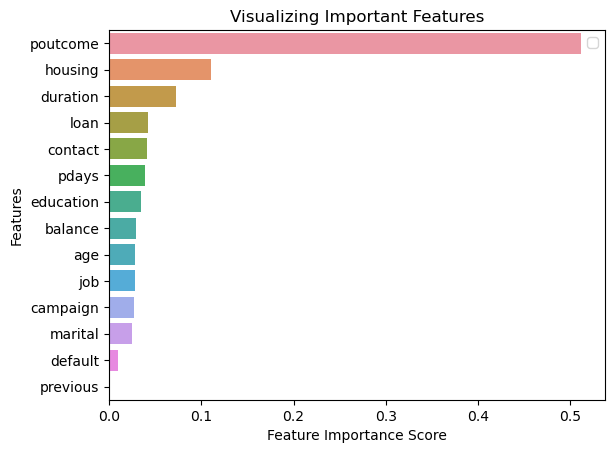

In [115]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Using a new record to predict if the client subscribed to a term deposit

In [116]:
new_data = pd.read_csv("D://BANK  PREDICTION DATASET.csv")

In [117]:
new_data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,33,0,0,0,0,3444,0,0,0,144,1,91,4,0
1,47,2,2,0,0,3533,0,0,1,319,1,100,2,1
2,31,1,1,2,0,442,1,0,1,69,1,270,2,2
3,31,3,1,1,0,609,0,0,1,1126,1,335,1,1
4,29,6,0,2,0,7707,1,1,0,961,2,334,2,1


In [118]:
rf.predict(new_data)

array([0, 1, 1, 1, 1])

In [121]:
knn.predict(new_data)

array([0, 0, 0, 1, 0])

In [122]:
model.predict(new_data)

array([0, 0, 0, 0, 1])

# Interpretation

# Performance Metrics
Accuracy: Measures the proportion of true results (both true positives and true negatives) among the total number of cases examined.
Precision: Measures the proportion of true positives among all positive results predicted by the classifier (how many selected items are relevant).
Recall: Measures the proportion of true positives among all actual positives (how many relevant items are selected).
F1 Score: Harmonic mean of precision and recall, providing a single measure of a test's accuracy.
# Interpretation of Metrics
XGBoost Classifier
Accuracy: 0.8287
The model correctly predicts 82.87% of the cases.
Precision: 0.5653
Out of all the positive predictions made by the model, 56.53% are actually positive.
Recall: 0.6406
The model correctly identifies 64.06% of all the actual positives.
F1 Score: 0.6006
This value provides a balance between precision and recall.
kNN Classifier
Accuracy: 0.8266
The model correctly predicts 82.66% of the cases.
Precision: 0.4776
Out of all the positive predictions made by the model, 47.76% are actually positive.
Recall: 0.6667
The model correctly identifies 66.67% of all the actual positives.
F1 Score: 0.5565
This value provides a balance between precision and recall.
Random Forest Classifier
Accuracy: 0.8419
The model correctly predicts 84.19% of the cases.
Precision: 0.6943
Out of all the positive predictions made by the model, 69.43% are actually positive.
Recall: 0.5466
The model correctly identifies 54.66% of all the actual positives.
F1 Score: 0.6117
This value provides a balance between precision and recall.
# Performance Analysis
XGBoost Classifier
Strengths: High recall (0.6406), meaning it identifies a larger proportion of actual positives compared to the Random Forest Classifier.
Weaknesses: Moderate precision (0.5653), leading to a higher rate of false positives compared to the Random Forest Classifier.
kNN Classifier
Strengths: Highest recall (0.6667), meaning it identifies the largest proportion of actual positives.
Weaknesses: Lowest precision (0.4776), leading to the highest rate of false positives. Also, it has the lowest F1 score (0.5565), indicating a less optimal balance between precision and recall.
Random Forest Classifier
Strengths: Highest accuracy (0.8419) and highest precision (0.6943), meaning it has the lowest rate of false positives.
Weaknesses: Lowest recall (0.5466) among the three classifiers, indicating it misses more actual positives compared to the other models.
# Summary and Recommendations
Best Overall Model: The Random Forest Classifier has the highest accuracy and precision, making it the best overall model for scenarios where reducing false positives is crucial.
Best for Identifying Positives: The kNN Classifier has the highest recall, making it suitable for situations where identifying as many positives as possible is important, even if it means having more false positives.
Balanced Approach: The XGBoost Classifier offers a balanced approach with good recall and precision, making it a solid choice if you need a trade-off between identifying positives and maintaining a lower rate of false positives.